# Traffic Accidents in Denver - Incident Analysis & Report

Authored by: Katie Chen and Zachary Francis

## Part I. Problem Statement - Dataset & Motivation
Denver's Open Data Catalogue keeps an open record of traffic accidents from the past few years in their [Open Data Catalogue](https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-traffic-accidents).  This data set can be used to possibly answer several inquiries:
- Are traffic accidents in Denver on an upward or downward trend?
- Are serious injuries or fatalites changing in any significant way?
- Are fatalaties or injuries more likely when a certain type of vehicle is at fault? Is the struck vehicle?

The data set can be accessed by downloading a CSV or calling against the REST API.  Ultimately it is a large file of comma separated values, with 48 columnns.  Not all the columns will be of use - there is especially a lot of location/spatial data that will probably not be prudent to the goals of this data analysis.  The CSV file has been downloaded and is included in the git repository of this notebook.  To make comparisons with traffic data from other cities, similar data sets will need to downloaded (or to save on reposity space - access through a web api via a `curl` call).  Comparing this data set against [Denver Traffic Counts](https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-traffic-counts) might also be useful to normalize the data against traffic density.  

In [1]:
# Can take 2+ minutes to download when the curl is executed
#!curl -o traffic_accidents.csv https://www.denvergov.org/media/gis/DataCatalog/traffic_accidents/csv/traffic_accidents.csv
#!head -n1 traffic_accidents.csv | tr ',' '\n' | nl

Some columns of interest will be the date, geospatial data if a an assessment is to be made on what driving locations or the most dangerous in Denver, the road description, the vehicle types, fatalities, and injuries.  Many of the records show signs of being hand entered, and there are cases of missing data.

In [2]:
import pandas as pd
traffic_data = pd.read_csv('traffic_accidents.csv')
traffic_data.head()

/var/folders/yv/p2v9r64s18x1j30cgyrnj6sh0000gr/T/ipykernel_62497/1871060462.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_data = pd.read_csv('traffic_accidents.csv')


,shape,object_id,incident_id,offense_id,offense_code,offense_code_extension,top_traffic_accident_offense,first_occurrence_date,last_occurrence_date,reported_date,...,TU2_DRIVER_HUMANCONTRIBFACTOR,TU2_PEDESTRIAN_ACTION,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2,POINT_X,POINT_Y
0,<geoprocessing describe geometry object object...,49728,2023202134,202320213454410,5441,0,TRAF - ACCIDENT,2023-04-19 10:53:00,2023-04-19 10:53:00,2023-04-19 10:53:00,...,No Apparent Contributing Factor,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,<geoprocessing describe geometry object object...,49729,2023202140,202320214054410,5441,0,TRAF - ACCIDENT,2023-04-19 11:00:00,2023-04-19 11:00:00,2023-04-19 11:22:00,...,No Apparent Contributing Factor,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,<geoprocessing describe geometry object object...,47271,2023165493,202316549354010,5401,0,TRAF - ACCIDENT - HIT & RUN,2023-03-31 09:45:00,2023-03-31 09:45:00,2023-03-31 09:45:00,...,No Apparent Contributing Factor,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,<geoprocessing describe geometry object object...,47272,2023166295,202316629554410,5441,0,TRAF - ACCIDENT,2023-03-31 16:54:00.000001,2023-03-31 16:54:00.000001,2023-03-31 16:54:00.000001,...,No Apparent Contributing Factor,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,<geoprocessing describe geometry object object...,47273,2023166532,202316653254010,5401,0,TRAF - ACCIDENT - HIT & RUN,2023-03-31 19:25:00.000001,2023-03-31 19:25:00.000001,2023-04-03 21:03:00,...,No Apparent Contributing Factor,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


There are 48 columns:
1. __SHAPE:__ Not described in the metadata
1. __OBJECTID_1:__ Record identification number used in this dataset
1. __INCIDENT_ID:__ Official record identification number assigned by the Denver Police Department
1. __OFFENSE_ID:__ Concatenation of INCIDENT_ID, OFFENSE_CODE, and OFFENSE_CODE_EXTENSION
1. __OFFENSE_CODE:__ Code indicating the type of offense
1. __OFFENSE_CODE_EXTENSION:__ Code indicating the offense subtype, if applicable
1. __TOP_TRAFFIC_ACCIDENT_OFFENSE:__ The most significant motor vehicle accident offense associated with the crash: FATAL, SBI, HIT & RUN, DUI, POLICE, ACCIDENT
1. __FIRST_OCCURRENCE_DATE:__ Earliest potential date and time of reported crash (In some cases, like a hit and run crash involving a parked vehicle, the reporting vehicle owner may not know the exact time of occurrence.)
1. __LAST_OCCURRENCE_DATE:__ Latest potential date and time of reported crash (In some cases, like a hit and run crash involving a parked vehicle, the reporting vehicle owner may not know the exact time of occurrence.)
1. __REPORTED_DATE:__ Date and time the crash was reported to DPD
1. __INCIDENT_ADDRESS:__ Approximate location of the incident
1. __GEO_X:__ Approximate horizontal location (east-west) of crash defined in the NAD 1983 State Plane feet Colorado Central FIPS 0502 projected coordinate system
1. __GEO_Y:__ Approximate vertical location (north-south) of crash defined in the NAD 1983 State Plane feet Colorado Central FIPS 0502 projected coordinate system
1. __GEO_LON:__ Approximate horizontal location (east-west) of crash defined in WGS 1984 geographic coordinate system
1. __GEO_LAT:__ Approximate vertical location (north-south) of crash defined in WGS 1984 geographic coordinate system
1. __DISTRICT_ID:__ Denver Police District where the crash occurred
1. __PRECINCT_ID:__	Denver Police Precinct where the crash occurred
1. __NEIGHBORHOOD_ID:__	Neighborhood where the crash occurred
1. __BICYCLE_IND:__ Indicates how many people riding bicycles were involved with the crash
1. __PEDESTRIAN_IND:__ Indicates how many pedestrians were involved with the crash
1. __HARMFUL_EVENT_SEQ_1:__ Indicates the first occurring harmful event in the crash
1. __HARMFUL_EVENT_SEQ_2:__ Indicates the second occurring harmful event in the crash
1. __HARMFUL_EVENT_SEQ_3:__ Indicates the most harmful event in the crash
1. __ROAD_LOCATION:__ Describes the specific location of the crash in relation to the roadway or if on private property
1. __ROAD_DESCRIPTION:__ Describes the specific location of the crash in relation to intersections, alleys, driveways, highway interchanges, and parking lots
1. __ROAD_CONTOUR:__ Describes the specific location of the crash relating to horizonal and vertical curves at the location of the first harmful event
1. __ROAD_CONDITION:__ Describes the roadway conditions at the time and location of the crash
1. __LIGHT_CONDITION:__ Describes the roadway lighting conditions at the time and location of the crash
1. __TU1_VEHICLE_TYPE:__ Indicates the vehicle type of traffic unit 1
1. __TU1_TRAVEL_DIRECTION:__ Indicates the vehicle direction prior to impact of traffic unit 1
1. __TU1_VEHICLE_MOVEMENT:__ Indicates the vehicle movement prior to impact of traffic unit 1
1. __TU1_DRIVER_ACTION:__ Indicates any action contibuting to the crash by the driver of traffic unit 1, when applicable
1. __TU1_DRIVER_HUMANCONTRIBFACTOR:__ Indicates any additional contributing factor to the crash by the driver of traffic unit 1, when applicable
1. __TU1_PEDESTRIAN_ACTION:__ Indicates any action contibuting to the crash by a pedestrian traffic unit 1, when applicable
1. __TU2_VEHICLE_TYPE:__ Indicates the vehicle type of traffic unit 2
1. __TU2_TRAVEL_DIRECTION:__ Indicates the vehicle direction prior to impact of traffic unit 2
1. __TU2_VEHICLE_MOVEMENT:__ Indicates the vehicle movement prior to impact of traffic unit 2
1. __TU2_DRIVER_ACTION:__ Indicates any action contibuting to the crash by the driver of traffic unit 2, when applicable
1. __TU2_DRIVER_HUMANCONTRIBFACTOR:__ Indicates any additional contributing factor to the crash by the driver of traffic unit 2, when applicable
1. __TU2_PEDESTRIAN_ACTION:__ Indicates any action contibuting to the crash by a pedestrian traffic unit 2, when applicable
1. __SERIOUSLY_INJURED:__ Indicates the number of people who were seriously injured as a result of the crash
1. __FATALITIES:__ Indicates the number of people who were fatally injured as a result of the crash
1. __FATALITY_MODE_1:__ Indicates the mode (means of travel) of a person fatally injured as a result of the crash, not related to traffic unit number
1. __FATALITY_MODE_2:__ Indicates the mode (means of travel) of a second person fatally injured as a result of the crash, not related to traffic unit number
1. __SERIOUSLY_INJURED_MODE_1:__ Indicates the mode (means of travel) of a person seriously injured as a result of the crash, not related to traffic unit number
1. __SERIOUSLY_INJURED_MODE_2:__ Indicates the mode (means of travel) of a second person seriously injured as a result of the crash, not related to traffic unit number
1. __POINT_X:__ Not described in the metadata
1. __POINT_Y:__ Not described in the metadata

### Part II. Literary Analysis

Previous works primarily focus on road conditions, time of day, location, and various human factors that contribute to traffic accidents, e.g. dry/icy roads, intersection vs. non intersection, driver action, etc. We know from these studies that the human factor causing the overwhelming majority of traffic accidents include aggressive/reckless driving, distracted driving, and inexperience. Injuries and fatalities from traffic accidents are least common on weekdays between midnight-5am, but spike on weekends including Fridays at around 2:30am. We also know that fatalities and injuries tend to occur around street non-intersections and intersections, with I-70 and Peoria Street being the most dangerous locations to date.

Our work differs from these analyses by focusing primarily on the vehicle types and details of mode of transport of the recorded incident. What types of vehicles cause the most injuries/fatalities? Are injuries and fatalities more likely when a certain type of vehicle is at fault? Our analysis digs deeper into the relationships between the different types of vehicles and modes of transport between a driver being hit and the driver at fault.

** See other works here:
- https://medium.com/denvertraffic/traffic-accident-analysis-and-predictive-indicators-in-denver-colorado-cbf3fd1bad00
- https://github.com/johnherr/Traffic-Accidents-in-Denver

### Part III. Data Cleaning & Type Conversion

To answer the research question, we first drop several columns from the data set that will not be relevant in the context of this problem.

In [3]:
# Dropping columns that won't be of obvious use
to_drop = ["shape","object_id","incident_id", "offense_id", "POINT_X", "POINT_Y",
           "first_occurrence_date", "last_occurrence_date"]
traffic_data = traffic_data.drop(to_drop, axis=1)

There are also several columns that are not related to the analysis presented in this paper.  The primary focus for this analysis is on fatalities, injuries, and vehicale types, so erroneous columns can be dropped from the data set.

In [4]:
to_drop = ['incident_address','geo_x','geo_y','geo_lon','geo_lat','district_id','precinct_id',
           'neighborhood_id','road_location','ROAD_CONTOUR','ROAD_CONDITION','LIGHT_CONDITION',
           'HARMFUL_EVENT_SEQ_1','HARMFUL_EVENT_SEQ_2']
traffic_data = traffic_data.drop(to_drop, axis=1)

The first three columns can be consolidated into a column called offense, using the last word in `top_traffic_accident_offense` to describe the offense associated with the accident.

In [5]:
traffic_data.top_traffic_accident_offense.value_counts()

top_traffic_accident_offense
TRAF - ACCIDENT                   152423
TRAF - ACCIDENT - HIT & RUN        65666
TRAF - ACCIDENT - DUI/DUID          6297
TRAF - ACCIDENT - SBI               3476
TRAF - ACCIDENT - POLICE            2193
TRAF - ACCIDENT - FATAL              611
Name: count, dtype: int64

In [6]:
traffic_data['OFFENSE'] = traffic_data.top_traffic_accident_offense.str.extract(r'- ([A-Z &/]+)\s*$')
traffic_data.OFFENSE.value_counts()

OFFENSE
ACCIDENT                   152423
HIT & RUN                   65666
DUI/DUID                     6297
SBI                          3476
POLICE                       2193
FATAL                         611
Name: count, dtype: int64

In [7]:
traffic_data = traffic_data.drop(['offense_code','offense_code_extension','top_traffic_accident_offense'], axis=1)

The remaining datatypes of the modified dataframe are mostly string objects:

In [8]:
traffic_data.dtypes

reported_date                     object
bicycle_ind                      float64
pedestrian_ind                   float64
HARMFUL_EVENT_SEQ_MOST            object
ROAD_DESCRIPTION                  object
TU1_VEHICLE_TYPE                  object
TU1_TRAVEL_DIRECTION              object
TU1_VEHICLE_MOVEMENT              object
TU1_DRIVER_ACTION                 object
TU1_DRIVER_HUMANCONTRIBFACTOR     object
TU1_PEDESTRIAN_ACTION             object
TU2_VEHICLE_TYPE                  object
TU2_TRAVEL_DIRECTION              object
TU2_VEHICLE_MOVEMENT              object
TU2_DRIVER_ACTION                 object
TU2_DRIVER_HUMANCONTRIBFACTOR     object
TU2_PEDESTRIAN_ACTION             object
SERIOUSLY_INJURED                float64
FATALITIES                       float64
FATALITY_MODE_1                   object
FATALITY_MODE_2                   object
SERIOUSLY_INJURED_MODE_1          object
SERIOUSLY_INJURED_MODE_2          object
OFFENSE                           object
dtype: object

The `reported_date` column can be converted into a Datetime object:

In [9]:
traffic_data['DATETIME'] = pd.to_datetime(traffic_data.reported_date, format='ISO8601')
traffic_data[['reported_date','DATETIME']]  # Confirm the dates look coded correctly

,reported_date,DATETIME
0,2023-04-19 10:53:00,2023-04-19 10:53:00.000000
1,2023-04-19 11:22:00,2023-04-19 11:22:00.000000
2,2023-03-31 09:45:00,2023-03-31 09:45:00.000000
3,2023-03-31 16:54:00.000001,2023-03-31 16:54:00.000001
4,2023-04-03 21:03:00,2023-04-03 21:03:00.000000
...,...,...
230661,2022-08-15 10:05:00,2022-08-15 10:05:00.000000
230662,2022-07-14 17:08:00,2022-07-14 17:08:00.000000
230663,2022-07-14 22:05:00,2022-07-14 22:05:00.000000
230664,2022-07-15 12:22:00,2022-07-15 12:22:00.000000


In [10]:
# Drop reported_date
traffic_data = traffic_data.drop('reported_date', axis=1)

The following line renames the Bicycle and Pedestrian indicator columns to be consistent with the rest of the column names:

In [11]:
traffic_data.rename(columns={'bicycle_ind':'BICYCLE_NUM', 'pedestrian_ind':'PEDESTRIAN_NUM'}, inplace=True)

Reorder the columns so that `DATETIME` appears first, then order by datetime since we will primarly be conducting time series analysis:

In [12]:
traffic_data = traffic_data[['DATETIME','BICYCLE_NUM', 'PEDESTRIAN_NUM',
       'HARMFUL_EVENT_SEQ_MOST', 'ROAD_DESCRIPTION', 'TU1_VEHICLE_TYPE',
       'TU1_TRAVEL_DIRECTION', 'TU1_VEHICLE_MOVEMENT',
       'TU1_DRIVER_ACTION', 'TU1_DRIVER_HUMANCONTRIBFACTOR',
       'TU1_PEDESTRIAN_ACTION', 'TU2_VEHICLE_TYPE',
       'TU2_TRAVEL_DIRECTION', 'TU2_VEHICLE_MOVEMENT',
       'TU2_DRIVER_ACTION', 'TU2_DRIVER_HUMANCONTRIBFACTOR',
       'TU2_PEDESTRIAN_ACTION', 'SERIOUSLY_INJURED', 'FATALITIES',
       'FATALITY_MODE_1', 'FATALITY_MODE_2', 'SERIOUSLY_INJURED_MODE_1',
       'SERIOUSLY_INJURED_MODE_2', 'OFFENSE']].sort_values('DATETIME')
traffic_data

,DATETIME,BICYCLE_NUM,PEDESTRIAN_NUM,HARMFUL_EVENT_SEQ_MOST,ROAD_DESCRIPTION,TU1_VEHICLE_TYPE,TU1_TRAVEL_DIRECTION,TU1_VEHICLE_MOVEMENT,TU1_DRIVER_ACTION,TU1_DRIVER_HUMANCONTRIBFACTOR,...,TU2_DRIVER_ACTION,TU2_DRIVER_HUMANCONTRIBFACTOR,TU2_PEDESTRIAN_ACTION,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2,OFFENSE
149003,2013-01-01 00:19:00.000000,0.0,0.0,GUARD RAIL,NON INTERSECTION,PASSENGER CAR/VAN,EAST,GOING STRAIGHT,CARELESS DRIVING,DISTRACTED PASSENGER,...,,,,0.0,0.0,,,,,ACCIDENT
150740,2013-01-01 00:32:00.000000,0.0,0.0,FRONT TO SIDE WITH MV IN TRANSPORT,AT INTERSECTION,SUV,NORTH,MAKING LEFT TURN,FAILED TO YIELD ROW,OTHER,...,OTHER,NO APPARENT,,0.0,0.0,,,,,ACCIDENT
158043,2013-01-01 00:33:00.000000,0.0,0.0,FRONT TO SIDE WITH MV IN TRANSPORT,AT INTERSECTION,PASSENGER CAR/VAN,EAST,MAKING U-TURN,FAILED TO YIELD ROW,NO APPARENT,...,OTHER,NO APPARENT,OTHER,0.0,0.0,,,,,HIT & RUN
141921,2013-01-01 00:45:00.000000,0.0,0.0,FRONT TO SIDE WITH MV IN TRANSPORT,AT INTERSECTION,SUV,EAST,GOING STRAIGHT,DISREGARDED OTHER DEVICE,NO APPARENT,...,OTHER,NO APPARENT,,0.0,0.0,,,,,ACCIDENT
150456,2013-01-01 01:03:00.000000,0.0,1.0,PEDESTRIAN-OTHER,NON INTERSECTION,,WEST,,,,...,OTHER,NO APPARENT,,0.0,0.0,,,,,ACCIDENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24037,2023-05-21 15:13:00.000000,0.0,0.0,Front to Side,Driveway Access Related,Passenger Car/Passenger Van,West,Making Right Turn,Failed to Yield ROW,Not Observed,...,NaN,No Apparent Contributing Factor,NaN,0.0,0.0,NaN,NaN,NaN,NaN,ACCIDENT
24039,2023-05-21 15:40:00.000001,0.0,0.0,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,...,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,NaN,NaN,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,ACCIDENT
24041,2023-05-21 15:59:00.000000,0.0,0.0,Front to Rear,Non-Intersection,Motorcycle,South,Going Straight,Followed Too Closely,No Apparent Contributing Factor,...,No Contributing Action,No Apparent Contributing Factor,NaN,0.0,0.0,NaN,NaN,NaN,NaN,ACCIDENT
24040,2023-05-21 16:23:00.000000,0.0,0.0,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,...,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,NaN,NaN,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,ACCIDENT


Checking for null values, we have:

In [13]:
traffic_data.isnull().sum()

DATETIME                             0
BICYCLE_NUM                       5023
PEDESTRIAN_NUM                    5023
HARMFUL_EVENT_SEQ_MOST            1369
ROAD_DESCRIPTION                   174
TU1_VEHICLE_TYPE                  2342
TU1_TRAVEL_DIRECTION              3211
TU1_VEHICLE_MOVEMENT              3320
TU1_DRIVER_ACTION                 4345
TU1_DRIVER_HUMANCONTRIBFACTOR     5584
TU1_PEDESTRIAN_ACTION            27464
TU2_VEHICLE_TYPE                  3627
TU2_TRAVEL_DIRECTION              4479
TU2_VEHICLE_MOVEMENT              3826
TU2_DRIVER_ACTION                 5677
TU2_DRIVER_HUMANCONTRIBFACTOR     5586
TU2_PEDESTRIAN_ACTION            27186
SERIOUSLY_INJURED                  830
FATALITIES                         830
FATALITY_MODE_1                  27722
FATALITY_MODE_2                  27778
SERIOUSLY_INJURED_MODE_1         27246
SERIOUSLY_INJURED_MODE_2         27723
OFFENSE                              0
dtype: int64

There are quite a lot of null values for `FATALITY_MODE`, `SERIOUSLY_INJURED_MODE`, and `PEDESTRIAN_ACTION`.  Let's check how these null values are distributed across the years in the data set:

In [14]:
print(traffic_data.isnull().groupby(traffic_data.DATETIME.dt.year).sum()[['TU1_PEDESTRIAN_ACTION','SERIOUSLY_INJURED_MODE_1','FATALITY_MODE_1']])


          TU1_PEDESTRIAN_ACTION  SERIOUSLY_INJURED_MODE_1  FATALITY_MODE_1
DATETIME                                                                  
2013                          0                         0                0
2014                          0                         0                0
2015                          0                         0                0
2016                          1                         0                0
2017                          2                         0                0
2018                          0                         0                0
2019                          0                         0                0
2020                          0                         0                0
2021                       4176                      4169             4215
2022                      16927                     16769            17093
2023                       6358                      6308             6414


All of these null values only appear within the last three years, so dropping them from the data set could seriously skew any time series analysis.  These values can be recoded to another value to represent that how accidents were recorded must have changed sometime in 2021.  However, null values for `FATALITIES` and `SERIOUSLY_INJURED` cannot be worked around since these attributes are crucial to our analysis.  There are a relatively low number of null values for these columns, so these can be safely dropped from the data.  The same can be done with the other float columns for `BICYCLE_NUM` and `PEDESTRIAN_NUM`.

In [15]:
print("Percentage of the total data affected by null values:")
print(traffic_data[['BICYCLE_NUM','PEDESTRIAN_NUM','SERIOUSLY_INJURED','FATALITIES']].isnull().sum() * 100 / len(traffic_data))

Percentage of the total data affected by null values:
BICYCLE_NUM          2.177607
PEDESTRIAN_NUM       2.177607
SERIOUSLY_INJURED    0.359828
FATALITIES           0.359828
dtype: float64


In [16]:
traffic_data.dropna(subset=['BICYCLE_NUM','PEDESTRIAN_NUM','SERIOUSLY_INJURED','FATALITIES'], inplace=True)
traffic_data.isnull().sum()

DATETIME                             0
BICYCLE_NUM                          0
PEDESTRIAN_NUM                       0
HARMFUL_EVENT_SEQ_MOST            1369
ROAD_DESCRIPTION                   174
TU1_VEHICLE_TYPE                  2342
TU1_TRAVEL_DIRECTION              3211
TU1_VEHICLE_MOVEMENT              3320
TU1_DRIVER_ACTION                 4345
TU1_DRIVER_HUMANCONTRIBFACTOR     5584
TU1_PEDESTRIAN_ACTION            27464
TU2_VEHICLE_TYPE                  3627
TU2_TRAVEL_DIRECTION              4479
TU2_VEHICLE_MOVEMENT              3826
TU2_DRIVER_ACTION                 5677
TU2_DRIVER_HUMANCONTRIBFACTOR     5586
TU2_PEDESTRIAN_ACTION            27186
SERIOUSLY_INJURED                    0
FATALITIES                           0
FATALITY_MODE_1                  27722
FATALITY_MODE_2                  27778
SERIOUSLY_INJURED_MODE_1         27246
SERIOUSLY_INJURED_MODE_2         27723
OFFENSE                              0
dtype: int64

The rest of the null values, especially since these are string objects, can be filled in with `UNKNOWN`:

In [17]:
traffic_data.fillna('UNKNOWN', inplace=True)
traffic_data.isnull().sum()

DATETIME                         0
BICYCLE_NUM                      0
PEDESTRIAN_NUM                   0
HARMFUL_EVENT_SEQ_MOST           0
ROAD_DESCRIPTION                 0
TU1_VEHICLE_TYPE                 0
TU1_TRAVEL_DIRECTION             0
TU1_VEHICLE_MOVEMENT             0
TU1_DRIVER_ACTION                0
TU1_DRIVER_HUMANCONTRIBFACTOR    0
TU1_PEDESTRIAN_ACTION            0
TU2_VEHICLE_TYPE                 0
TU2_TRAVEL_DIRECTION             0
TU2_VEHICLE_MOVEMENT             0
TU2_DRIVER_ACTION                0
TU2_DRIVER_HUMANCONTRIBFACTOR    0
TU2_PEDESTRIAN_ACTION            0
SERIOUSLY_INJURED                0
FATALITIES                       0
FATALITY_MODE_1                  0
FATALITY_MODE_2                  0
SERIOUSLY_INJURED_MODE_1         0
SERIOUSLY_INJURED_MODE_2         0
OFFENSE                          0
dtype: int64

The columns __FATALITY_MODE_1__, __FATALITIY_MODE_2__, __SERIOUSLY_INJURED_MODE_1__, and __SERIOUSLY_INJURED_MODE_2__ have row values of empty string '  '. For these categories, we also filled in a value of `UNKNOWN`.

In [18]:
print("Fatality Mode 1: ",traffic_data['FATALITY_MODE_1'].unique())
print("\n", "Fatality Mode 2: ",traffic_data['FATALITY_MODE_2'].unique())
print("\n", "Seriously Injured Mode 1: ", traffic_data['SERIOUSLY_INJURED_MODE_1'].unique())
print("\n", "Seriously Injured Mode 2: ",traffic_data['SERIOUSLY_INJURED_MODE_2'].unique())

Fatality Mode 1:  ['  ' 'SUV' 'PASSENGER CAR/VAN' 'PEDESTRIAN' 'OTHER'
 'PICKUP TRUCK/UTILITY VAN' 'MOTORCYCLE' 'MOTORIZED BICYCLE'
 'PICKUP TRUCK/UTILITY VAN WITH TRAILIER' 'BICYCLE'
 'VEHICLE OVER 10000 LBS' 'SCHOOL BUS' 'FARM EQUIPMENT' 'UNKNOWN'
 'Passenger Car/Passenger Van' 'Motorcycle' 'Off Highway Vehicle/ATV'
 'Pickup Truck/Utility Van'
 'Medium/Heavy Trucks GVWR/GCWR between 10,001 and 16,000']

 Fatality Mode 2:  ['  ' 'OTHER' 'PASSENGER CAR/VAN' 'MOTORCYCLE' 'UNKNOWN'
 'PICKUP TRUCK/UTILITY VAN' 'Passenger Car/Passenger Van' 'Motorcycle']

 Seriously Injured Mode 1:  ['  ' 'PASSENGER CAR/VAN' 'PEDESTRIAN' 'BICYCLE'
 'PICKUP TRUCK/UTILITY VAN' 'OTHER' 'SUV' 'MOTORCYCLE'
 'PICKUP TRUCK/UTILITY VAN WITH TRAILIER' 'MOTORIZED BICYCLE'
 'TRANSIT BUS' 'PASSENGER CAR/VAN WITH TRAILER' 'HIT AND RUN UNKNOWN'
 'VEHICLE OVER 10000 LBS' 'NON-SCHOOL BUS' 'LIGHT RAIL' 'SUV WITH TRAILER'
 'SCHOOL BUS' 'UNKNOWN' 'Passenger Car/Passenger Van' 'Motorcycle'
 'Pickup Truck/Utility Van' 'Other V

In [19]:
# Replace empty cells with UNKNOWN
traffic_data['FATALITY_MODE_1'] = traffic_data['FATALITY_MODE_1'].replace('  ', 'UNKNOWN')
traffic_data['FATALITY_MODE_2'] = traffic_data['FATALITY_MODE_2'].replace('  ', 'UNKNOWN')
traffic_data['SERIOUSLY_INJURED_MODE_1'] = traffic_data['SERIOUSLY_INJURED_MODE_1'].replace('  ', 'UNKNOWN')
traffic_data['SERIOUSLY_INJURED_MODE_2'] = traffic_data['SERIOUSLY_INJURED_MODE_2'].replace('  ', 'UNKNOWN')

print("Fatality Mode 1: ",traffic_data['FATALITY_MODE_1'].unique())
print("\n", "Fatality Mode 2: ",traffic_data['FATALITY_MODE_2'].unique())
print("\n", "Seriously Injured Mode 1: ", traffic_data['SERIOUSLY_INJURED_MODE_1'].unique())
print("\n", "Seriously Injured Mode 2: ",traffic_data['SERIOUSLY_INJURED_MODE_2'].unique())

Fatality Mode 1:  ['UNKNOWN' 'SUV' 'PASSENGER CAR/VAN' 'PEDESTRIAN' 'OTHER'
 'PICKUP TRUCK/UTILITY VAN' 'MOTORCYCLE' 'MOTORIZED BICYCLE'
 'PICKUP TRUCK/UTILITY VAN WITH TRAILIER' 'BICYCLE'
 'VEHICLE OVER 10000 LBS' 'SCHOOL BUS' 'FARM EQUIPMENT'
 'Passenger Car/Passenger Van' 'Motorcycle' 'Off Highway Vehicle/ATV'
 'Pickup Truck/Utility Van'
 'Medium/Heavy Trucks GVWR/GCWR between 10,001 and 16,000']

 Fatality Mode 2:  ['UNKNOWN' 'OTHER' 'PASSENGER CAR/VAN' 'MOTORCYCLE'
 'PICKUP TRUCK/UTILITY VAN' 'Passenger Car/Passenger Van' 'Motorcycle']

 Seriously Injured Mode 1:  ['UNKNOWN' 'PASSENGER CAR/VAN' 'PEDESTRIAN' 'BICYCLE'
 'PICKUP TRUCK/UTILITY VAN' 'OTHER' 'SUV' 'MOTORCYCLE'
 'PICKUP TRUCK/UTILITY VAN WITH TRAILIER' 'MOTORIZED BICYCLE'
 'TRANSIT BUS' 'PASSENGER CAR/VAN WITH TRAILER' 'HIT AND RUN UNKNOWN'
 'VEHICLE OVER 10000 LBS' 'NON-SCHOOL BUS' 'LIGHT RAIL' 'SUV WITH TRAILER'
 'SCHOOL BUS' 'Passenger Car/Passenger Van' 'Motorcycle'
 'Pickup Truck/Utility Van' 'Other Vehicle Type (De

For these 4 columns, we also have some duplicate labels that are likely a result of changes over time in labeling rules, typos, or changing naming conventions. For these values, we simply replace them with a single label, e.g. 'Passenger Car/Passenger Van' = 'PASSENGER CAR/VAN'.

In [20]:
# Manual Re-labeling

# Fatality Mode 1
traffic_data['FATALITY_MODE_1'] = traffic_data['FATALITY_MODE_1'].replace('Motorcycle', 'MOTORCYCLE')
traffic_data['FATALITY_MODE_1'] = traffic_data['FATALITY_MODE_1'].replace('Passenger Car/Passenger Van', 'PASSENGER CAR/VAN')
traffic_data['FATALITY_MODE_1'] = traffic_data['FATALITY_MODE_1'].replace('Pickup Truck/Utility Van', 'PICKUP TRUCK/UTILITY VAN')
traffic_data['FATALITY_MODE_1'] = traffic_data['FATALITY_MODE_1'].replace('Medium/Heavy Trucks GVWR/GCWR between 10,001 and 16,000', 'VEHICLE OVER 10000 LBS')

# Fatality Mode 2
traffic_data['FATALITY_MODE_2'] = traffic_data['FATALITY_MODE_2'].replace('Motorcycle', 'MOTORCYCLE')
traffic_data['FATALITY_MODE_2'] = traffic_data['FATALITY_MODE_2'].replace('Passenger Car/Passenger Van', 'PASSENGER CAR/VAN')

# Seriously Injured Mode 1
traffic_data['SERIOUSLY_INJURED_MODE_1'] = traffic_data['SERIOUSLY_INJURED_MODE_1'].replace('NON-SCHOOL BUS', 'TRANSIT BUS')
traffic_data['SERIOUSLY_INJURED_MODE_1'] = traffic_data['SERIOUSLY_INJURED_MODE_1'].replace('Motorcycle', 'MOTORCYCLE')
traffic_data['SERIOUSLY_INJURED_MODE_1'] = traffic_data['SERIOUSLY_INJURED_MODE_1'].replace('Passenger Car/Passenger Van', 'PASSENGER CAR/VAN')
traffic_data['SERIOUSLY_INJURED_MODE_1'] = traffic_data['SERIOUSLY_INJURED_MODE_1'].replace('Pickup Truck/Utility Van', 'PICKUP TRUCK/UTILITY VAN')
traffic_data['SERIOUSLY_INJURED_MODE_1'] = traffic_data['SERIOUSLY_INJURED_MODE_1'].replace('Other Vehicle Type (Describe in Narative)', 'OTHER')
traffic_data['SERIOUSLY_INJURED_MODE_1'] = traffic_data['SERIOUSLY_INJURED_MODE_1'].replace('Medium/Heavy Trucks GVWR/GCWR between 10,001 and 16,000', 'VEHICLE OVER 10000 LBS')
traffic_data['SERIOUSLY_INJURED_MODE_1'] = traffic_data['SERIOUSLY_INJURED_MODE_1'].replace('Unknown (Hit and Run Only)', 'HIT AND RUN UNKNOWN')
traffic_data['SERIOUSLY_INJURED_MODE_1'] = traffic_data['SERIOUSLY_INJURED_MODE_1'].replace('PEDESTERIAN', 'PEDESTRIAN')
traffic_data['SERIOUSLY_INJURED_MODE_1'] = traffic_data['SERIOUSLY_INJURED_MODE_1'].replace('Transit Bus', 'TRANSIT BUS')


# Seriously Injured Mode 2
traffic_data['SERIOUSLY_INJURED_MODE_2'] = traffic_data['SERIOUSLY_INJURED_MODE_2'].replace('Passenger Car/Passenger Van', 'PASSENGER CAR/VAN')
traffic_data['SERIOUSLY_INJURED_MODE_2'] = traffic_data['SERIOUSLY_INJURED_MODE_2'].replace('Pickup Truck/Utility Van', 'PICKUP TRUCK/UTILITY VAN')
traffic_data['SERIOUSLY_INJURED_MODE_2'] = traffic_data['SERIOUSLY_INJURED_MODE_2'].replace('Motorcycle', 'MOTORCYCLE')
traffic_data['SERIOUSLY_INJURED_MODE_2'] = traffic_data['SERIOUSLY_INJURED_MODE_2'].replace('NON-SCHOOL BUS', 'TRANSIT BUS')


print("Fatality Mode 1: ",traffic_data['FATALITY_MODE_1'].unique())
print("\n", "Fatality Mode 2: ",traffic_data['FATALITY_MODE_2'].unique())
print("\n", "Seriously Injured Mode 1: ", traffic_data['SERIOUSLY_INJURED_MODE_1'].unique())
print("\n", "Seriously Injured Mode 2: ",traffic_data['SERIOUSLY_INJURED_MODE_2'].unique())

Fatality Mode 1:  ['UNKNOWN' 'SUV' 'PASSENGER CAR/VAN' 'PEDESTRIAN' 'OTHER'
 'PICKUP TRUCK/UTILITY VAN' 'MOTORCYCLE' 'MOTORIZED BICYCLE'
 'PICKUP TRUCK/UTILITY VAN WITH TRAILIER' 'BICYCLE'
 'VEHICLE OVER 10000 LBS' 'SCHOOL BUS' 'FARM EQUIPMENT'
 'Off Highway Vehicle/ATV']

 Fatality Mode 2:  ['UNKNOWN' 'OTHER' 'PASSENGER CAR/VAN' 'MOTORCYCLE'
 'PICKUP TRUCK/UTILITY VAN']

 Seriously Injured Mode 1:  ['UNKNOWN' 'PASSENGER CAR/VAN' 'PEDESTRIAN' 'BICYCLE'
 'PICKUP TRUCK/UTILITY VAN' 'OTHER' 'SUV' 'MOTORCYCLE'
 'PICKUP TRUCK/UTILITY VAN WITH TRAILIER' 'MOTORIZED BICYCLE'
 'TRANSIT BUS' 'PASSENGER CAR/VAN WITH TRAILER' 'HIT AND RUN UNKNOWN'
 'VEHICLE OVER 10000 LBS' 'LIGHT RAIL' 'SUV WITH TRAILER' 'SCHOOL BUS'
 'Motor Home' 'Low Speed Vehicle' 'Autocycle']

 Seriously Injured Mode 2:  ['UNKNOWN' 'PICKUP TRUCK/UTILITY VAN'
 'PICKUP TRUCK/UTILITY VAN WITH TRAILIER' 'PASSENGER CAR/VAN' 'MOTORCYCLE'
 'PEDESTRIAN' 'SUV' 'MOTORIZED BICYCLE' 'OTHER'
 'PASSENGER CAR/VAN WITH TRAILER' 'VEHICLE OVER 

Duplicate values due to the above errors are also common in the column of interest __TU1_VEHICLE_TYPE__. To solve this, we repeat the above steps:

Replacements:
- Consolidate anything with a trailer
- Group weight class of trucks
- Groups busses (includes school busses and transit busses)


In [21]:
# Cleaning up TU1_VEHICLE_TYPE
traffic_data['TU1_VEHICLE_TYPE'] = traffic_data['TU1_VEHICLE_TYPE'].apply(str.upper)
traffic_data['TU1_VEHICLE_TYPE'] = traffic_data['TU1_VEHICLE_TYPE'].replace('  ', 'UNKNOWN')
traffic_data['TU1_VEHICLE_TYPE'] = traffic_data['TU1_VEHICLE_TYPE'].replace(r'(^.*PASSENGER.*$)','PASSENGER CAR/VAN', regex=True)
traffic_data['TU1_VEHICLE_TYPE'] = traffic_data['TU1_VEHICLE_TYPE'].replace('0', 'UNKNOWN')
traffic_data['TU1_VEHICLE_TYPE'] = traffic_data['TU1_VEHICLE_TYPE'].replace('UNK', 'UNKNOWN')
traffic_data['TU1_VEHICLE_TYPE'] = traffic_data['TU1_VEHICLE_TYPE'].replace(r'(^.*BUS.*$)', 'BUS', regex=True)
traffic_data['TU1_VEHICLE_TYPE'] = traffic_data['TU1_VEHICLE_TYPE'].replace(r'(^.*MEDIUM/HEAVY TRUCKS.*$)', 'BUS', regex=True)
traffic_data['TU1_VEHICLE_TYPE'] = traffic_data['TU1_VEHICLE_TYPE'].replace(r'(^.*PICKUP TRUCK.*$)', 'PICKUP TRUCK', regex=True)
traffic_data['TU1_VEHICLE_TYPE'] = traffic_data['TU1_VEHICLE_TYPE'].replace(r'(^.*SUV.*$)', 'SUV', regex=True)
traffic_data['TU1_VEHICLE_TYPE'] = traffic_data['TU1_VEHICLE_TYPE'].replace(r'(^.*OTHER.*$)','OTHER', regex=True)
traffic_data['TU1_VEHICLE_TYPE'] = traffic_data['TU1_VEHICLE_TYPE'].replace(r'(^.*UNKNOWN.*$)','UNKNOWN', regex=True)

traffic_data['TU1_VEHICLE_TYPE'].unique()


array(['PASSENGER CAR/VAN', 'SUV', 'UNKNOWN', 'PICKUP TRUCK', 'BUS',
       'VEHICLE OVER 10000 LBS', 'OTHER', 'BICYCLE', 'MOTOR HOME',
       'MOTORCYCLE', 'MOTORIZED BICYCLE', 'FARM EQUIPMENT', 'LIGHT RAIL',
       'AUTOCYCLE', 'WORKING VEHICLE/EQUIPMENT', 'LOW SPEED VEHICLE',
       'OFF HIGHWAY VEHICLE/ATV'], dtype=object)

In [22]:
traffic_data['TU1_VEHICLE_TYPE'].value_counts()

TU1_VEHICLE_TYPE
PASSENGER CAR/VAN            109359
SUV                           49192
PICKUP TRUCK                  29932
UNKNOWN                       20085
VEHICLE OVER 10000 LBS         6323
OTHER                          4378
BUS                            2611
MOTORCYCLE                     1495
BICYCLE                        1129
MOTOR HOME                      184
MOTORIZED BICYCLE                92
WORKING VEHICLE/EQUIPMENT        63
AUTOCYCLE                        33
LIGHT RAIL                       27
FARM EQUIPMENT                   24
LOW SPEED VEHICLE                 9
OFF HIGHWAY VEHICLE/ATV           6
Name: count, dtype: int64

Remove low frequency values

In [23]:
counts = traffic_data['TU1_VEHICLE_TYPE'].value_counts() > 100
traffic_data = traffic_data[traffic_data['TU1_VEHICLE_TYPE'].isin(counts[counts].index.values)]
traffic_data['TU1_VEHICLE_TYPE'].value_counts()

TU1_VEHICLE_TYPE
PASSENGER CAR/VAN         109359
SUV                        49192
PICKUP TRUCK               29932
UNKNOWN                    20085
VEHICLE OVER 10000 LBS      6323
OTHER                       4378
BUS                         2611
MOTORCYCLE                  1495
BICYCLE                     1129
MOTOR HOME                   184
Name: count, dtype: int64

Final summary of the dataframe:

In [24]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224688 entries, 149003 to 24042
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DATETIME                       224688 non-null  datetime64[ns]
 1   BICYCLE_NUM                    224688 non-null  float64       
 2   PEDESTRIAN_NUM                 224688 non-null  float64       
 3   HARMFUL_EVENT_SEQ_MOST         224688 non-null  object        
 4   ROAD_DESCRIPTION               224688 non-null  object        
 5   TU1_VEHICLE_TYPE               224688 non-null  object        
 6   TU1_TRAVEL_DIRECTION           224688 non-null  object        
 7   TU1_VEHICLE_MOVEMENT           224688 non-null  object        
 8   TU1_DRIVER_ACTION              224688 non-null  object        
 9   TU1_DRIVER_HUMANCONTRIBFACTOR  224688 non-null  object        
 10  TU1_PEDESTRIAN_ACTION          224688 non-null  object        
 11  T

### Part IV. Analysis

The below cell shows the total number of traffic incidents from 2013-2023:

/var/folders/yv/p2v9r64s18x1j30cgyrnj6sh0000gr/T/ipykernel_62497/3550324922.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_data['Year-Month'] = traffic_data.DATETIME.dt.to_period("M")


<Axes: title={'center': 'Number of Traffic Incidents Recorded Month over Month'}, xlabel='Year-Month', ylabel='Number of Traffic Incidents'>

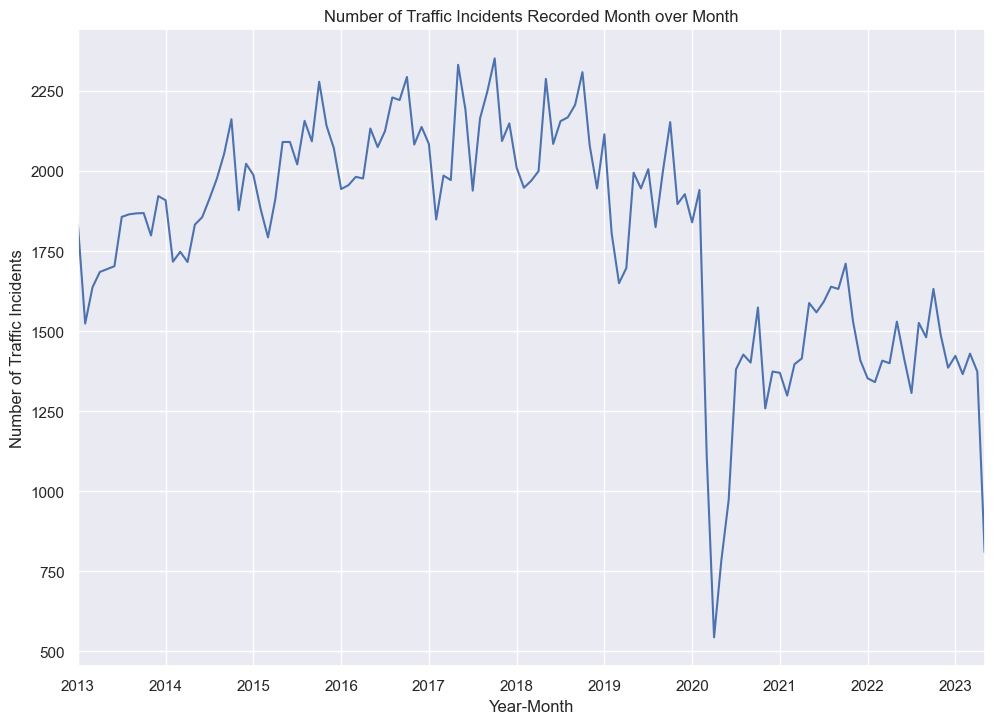

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

traffic_data['Year-Month'] = traffic_data.DATETIME.dt.to_period("M")

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.ylabel('Number of Traffic Incidents')
plt.title('Number of Traffic Incidents Recorded Month over Month')
traffic_data.groupby(traffic_data['Year-Month'])["DATETIME"].count().plot()

The initial exploratory analysis reveals that the total number of recorded traffic incidents generally appears to be on a downward trend, with 2020 resulting in the fewest number of incidents.  This data set only includes accidents reported to the Denver Police Department, so trends in the data may not definitely represent a change in the number of accidents but rather a change in the number of _reported_ accidents.

The below cells show the total number of fatalities and serious injuries between 2013-2023 as a result of a traffic incident:

<Axes: title={'center': 'Number of Incident Fatalities by Year since 2013'}, xlabel='DATETIME', ylabel='Number of Fatalities'>

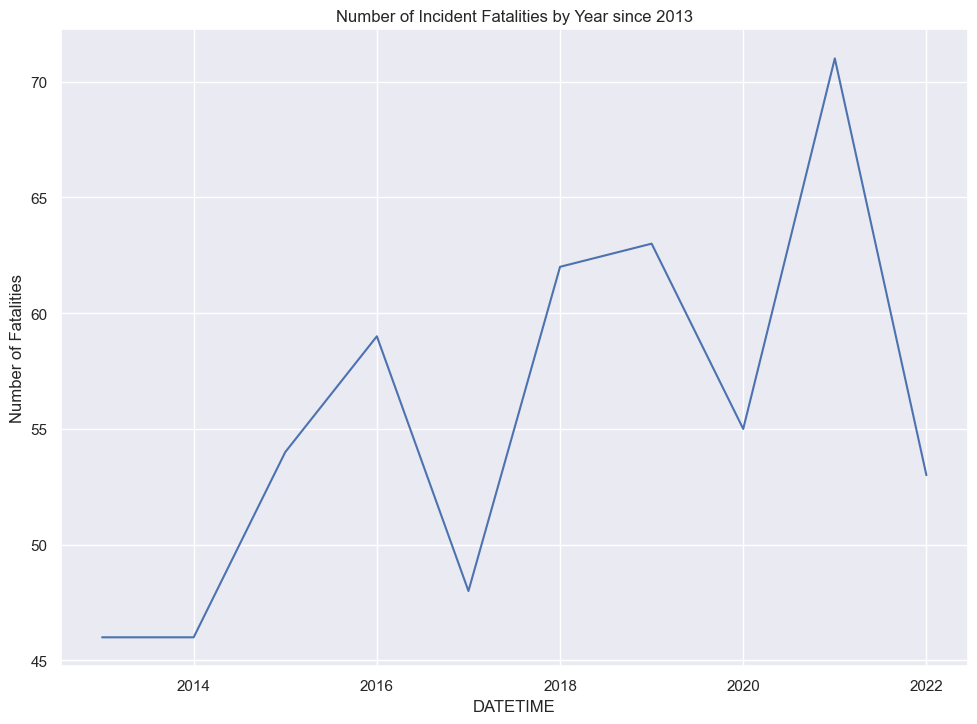

In [26]:
# we can plot fatalities over time
# we can plot seriosly injured over time
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.title('Number of Incident Fatalities by Year since 2013')
traffic_data[traffic_data.DATETIME.dt.year < 2023].groupby(traffic_data.DATETIME.dt.year)['FATALITIES'].sum().plot()


<Axes: title={'center': 'Number of Incident Injuries by Year since 2013'}, xlabel='DATETIME', ylabel='Number of Seriously Injured'>

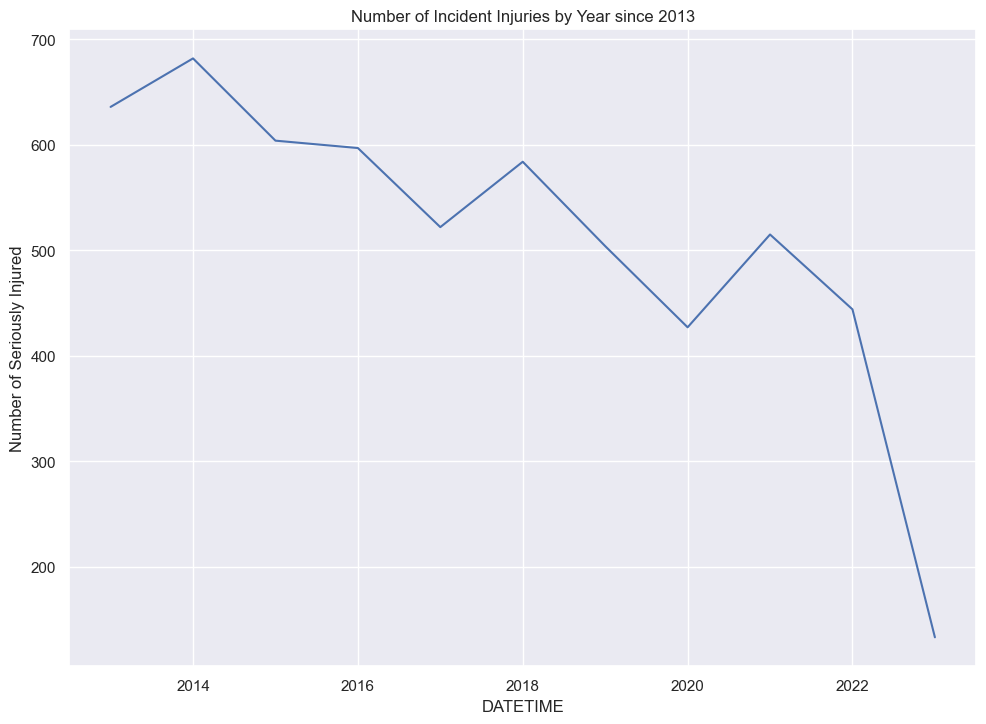

In [27]:
plt.xlabel('Year')
plt.ylabel('Number of Seriously Injured')
plt.title('Number of Incident Injuries by Year since 2013')
traffic_data.groupby(traffic_data.DATETIME.dt.year)['SERIOUSLY_INJURED'].sum().plot()

Again, it appears that both injuries and fatalities from traffic incidents generally appear to be on a downward trend. However, the number of serious injuries still appears to be significantly higher than fatalities from traffic incidents.

Looking more closely at features of fatal incidents:

In [28]:
fatal = traffic_data[traffic_data.FATALITIES > 0]
fatal.FATALITY_MODE_1.value_counts()

FATALITY_MODE_1
PASSENGER CAR/VAN                         168
MOTORCYCLE                                105
PEDESTRIAN                                103
SUV                                        60
OTHER                                      43
PICKUP TRUCK/UTILITY VAN                   27
BICYCLE                                    22
VEHICLE OVER 10000 LBS                      5
PICKUP TRUCK/UTILITY VAN WITH TRAILIER      3
MOTORIZED BICYCLE                           1
UNKNOWN                                     1
SCHOOL BUS                                  1
FARM EQUIPMENT                              1
Name: count, dtype: int64

In [29]:
fatal.TU1_VEHICLE_TYPE.value_counts()

TU1_VEHICLE_TYPE
PASSENGER CAR/VAN         192
SUV                        90
MOTORCYCLE                 79
OTHER                      68
PICKUP TRUCK               50
UNKNOWN                    29
BICYCLE                    14
VEHICLE OVER 10000 LBS     12
BUS                         5
MOTOR HOME                  1
Name: count, dtype: int64

<Axes: xlabel='DATETIME'>

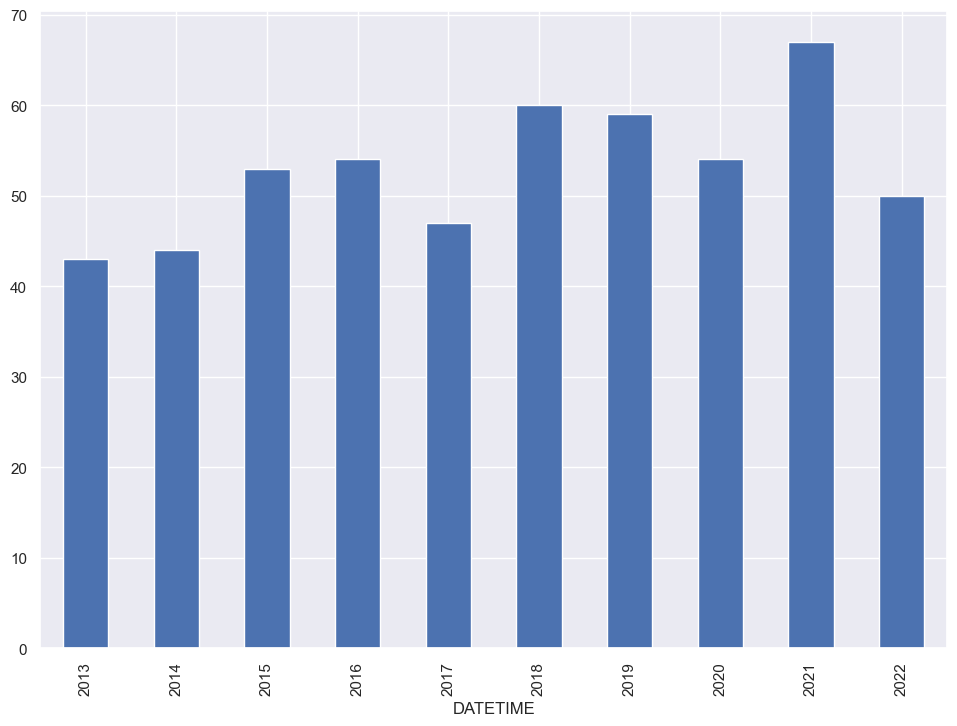

In [30]:
fatal[fatal.DATETIME.dt.year < 2023].groupby(fatal.DATETIME.dt.year)['DATETIME'].count().plot(kind='bar')

Despite traffic accidents decreasing during the pandemic, fatalities seems unchanged

In [31]:
# Fatality mode will probably only have date if there is a fatality
# There are 103 entries that involve a pedestrian fatality
traffic_data[traffic_data.FATALITY_MODE_1 == "PEDESTRIAN"]

,DATETIME,BICYCLE_NUM,PEDESTRIAN_NUM,HARMFUL_EVENT_SEQ_MOST,ROAD_DESCRIPTION,TU1_VEHICLE_TYPE,TU1_TRAVEL_DIRECTION,TU1_VEHICLE_MOVEMENT,TU1_DRIVER_ACTION,TU1_DRIVER_HUMANCONTRIBFACTOR,...,TU2_DRIVER_HUMANCONTRIBFACTOR,TU2_PEDESTRIAN_ACTION,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2,OFFENSE,Year-Month
158437,2013-01-22 17:56:00.000000,0.0,1.0,PEDESTRIAN-OTHER,NON INTERSECTION,UNKNOWN,NORTH,,,,...,NO APPARENT,,0.0,1.0,PEDESTRIAN,UNKNOWN,UNKNOWN,UNKNOWN,FATAL,2013-01
132992,2013-04-09 02:00:00.000000,0.0,1.0,PEDESTRIAN-OTHER,AT INTERSECTION,PASSENGER CAR/VAN,NORTH,GOING STRAIGHT,RECKLESS DRIVING,DUI/DWAI/DUID,...,,CROSS/ENTER AT INTERSECTION,0.0,1.0,PEDESTRIAN,UNKNOWN,UNKNOWN,UNKNOWN,FATAL,2013-04
37329,2013-04-12 00:55:00.000000,0.0,1.0,PEDESTRIAN-OTHER,NON INTERSECTION,UNKNOWN,NORTH,,,,...,NO APPARENT,,0.0,1.0,PEDESTRIAN,UNKNOWN,UNKNOWN,UNKNOWN,FATAL,2013-04
135555,2013-05-11 21:42:00.000000,0.0,1.0,PEDESTRIAN-OTHER,INTERSECTION RELATED,UNKNOWN,EAST,GOING STRAIGHT,,,...,NO APPARENT,,0.0,1.0,PEDESTRIAN,UNKNOWN,UNKNOWN,UNKNOWN,FATAL,2013-05
149260,2013-05-18 22:02:00.000000,0.0,1.0,PEDESTRIAN-OTHER,ALLEY RELATED,SUV,NORTH,GOING STRAIGHT,CARELESS DRIVING,OTHER,...,,,0.0,1.0,PEDESTRIAN,UNKNOWN,UNKNOWN,UNKNOWN,FATAL,2013-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158308,2021-10-24 00:12:00.000000,0.0,1.0,OTHER-NONCOLLISION,NON INTERSECTION,UNKNOWN,WEST,GOING STRAIGHT,No Action,NO APPARENT,...,OTHER,OTHER,0.0,1.0,PEDESTRIAN,OTHER,OTHER,OTHER,FATAL,2021-10
211532,2021-10-27 04:50:00.000000,0.0,1.0,PEDESTRIAN-OTHER,AT INTERSECTION,OTHER,WEST,OTHER,OTHER,OTHER,...,NO APPARENT,OTHER,0.0,1.0,PEDESTRIAN,OTHER,OTHER,OTHER,FATAL,2021-10
117917,2021-11-15 13:00:00.000000,0.0,1.0,PEDESTRIAN-OTHER,NON INTERSECTION,PASSENGER CAR/VAN,NORTH,MAKING RIGHT TURN,FAILED TO YIELD ROW,DISTRACTED-OTHER,...,OTHER,OTHER,0.0,1.0,PEDESTRIAN,OTHER,OTHER,OTHER,FATAL,2021-11
34430,2021-11-22 01:25:00.000001,0.0,1.0,PEDESTRIAN-OTHER,NON INTERSECTION,OTHER,EAST,GOING STRAIGHT,OTHER,NO APPARENT,...,NO APPARENT,OTHER,0.0,1.0,PEDESTRIAN,OTHER,OTHER,OTHER,FATAL,2021-11


Looking closely at incidents resulting in serious injuries:

In [32]:
injured = traffic_data[traffic_data.SERIOUSLY_INJURED > 0]
injured.SERIOUSLY_INJURED_MODE_1.value_counts()

SERIOUSLY_INJURED_MODE_1
PASSENGER CAR/VAN                         1821
MOTORCYCLE                                 785
SUV                                        687
PEDESTRIAN                                 509
OTHER                                      453
BICYCLE                                    280
PICKUP TRUCK/UTILITY VAN                   234
PICKUP TRUCK/UTILITY VAN WITH TRAILIER      39
VEHICLE OVER 10000 LBS                      32
UNKNOWN                                     23
TRANSIT BUS                                 15
HIT AND RUN UNKNOWN                         14
MOTORIZED BICYCLE                           12
PASSENGER CAR/VAN WITH TRAILER               8
SUV WITH TRAILER                             3
SCHOOL BUS                                   2
LIGHT RAIL                                   1
Motor Home                                   1
Low Speed Vehicle                            1
Name: count, dtype: int64

/var/folders/yv/p2v9r64s18x1j30cgyrnj6sh0000gr/T/ipykernel_62497/2082001197.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injured['Year'] = injured.DATETIME.dt.year


Text(0.5, 1.0, 'Number of Seriously Injured by Mode and Year')

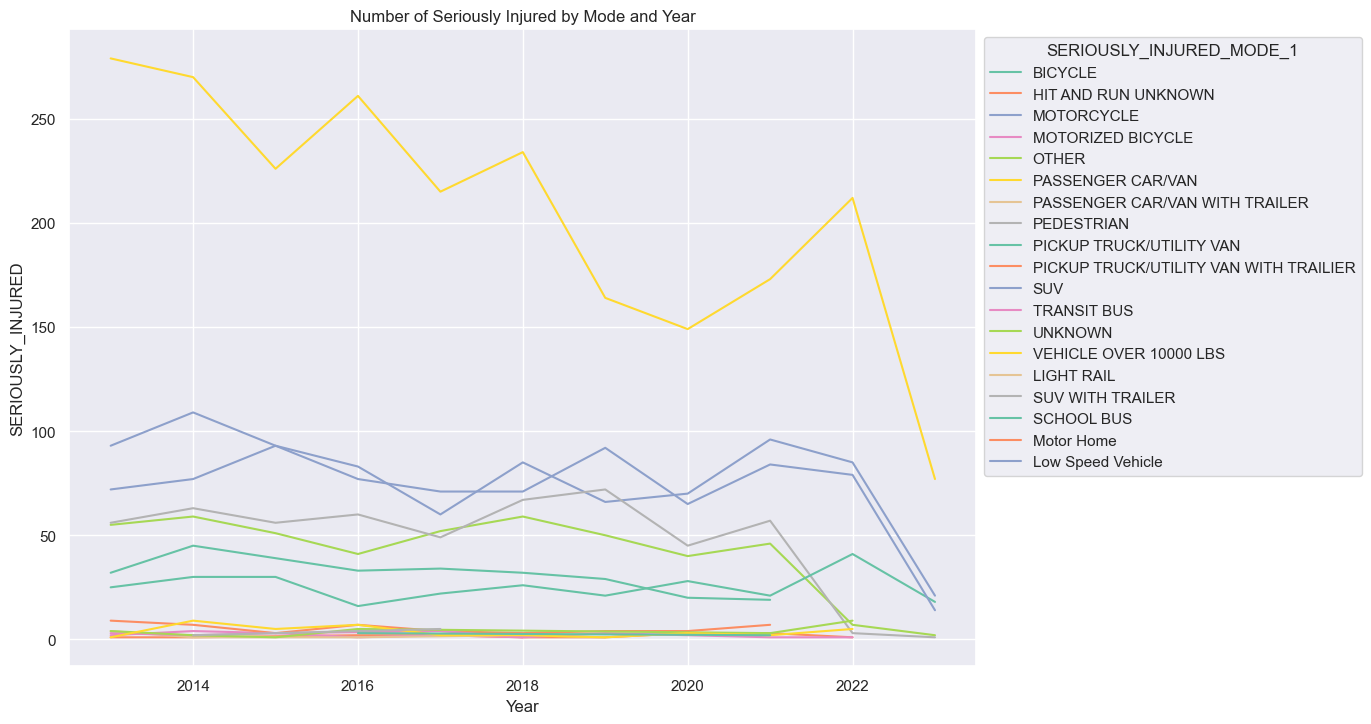

In [33]:
#injured.groupby('SERIOUSLY_INJURED_MODE_1')['SERIOUSLY_INJURED'].sum().plot()

# injured.set_index(injured.Datetime.dt.year, inplace=True)
# injured.groupby('SERIOUSLY_INJURED_MODE_1')['SERIOUSLY_INJURED'].sum().plot(legend=True, xlabel="Year", ylabel="injured")

injured['Year'] = injured.DATETIME.dt.year
injuries_over_time1 = injured.groupby(['Year','SERIOUSLY_INJURED_MODE_1'], as_index=False)['SERIOUSLY_INJURED'].sum()
injuries_over_time1


ax = sns.lineplot(x= 'Year', y='SERIOUSLY_INJURED', hue='SERIOUSLY_INJURED_MODE_1', palette = "Set2", data=injuries_over_time1)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Number of Seriously Injured by Mode and Year")


From the plot above, we can see that the majority of the victims who were seriously injured in a traffic incident appeared to have been in passenger cars/vans, followed by motorcycles and suvs, while generally, the overall trend of serious traffic accidents appears to be decreasing. 

Text(0, 0.5, 'Vehicle type')

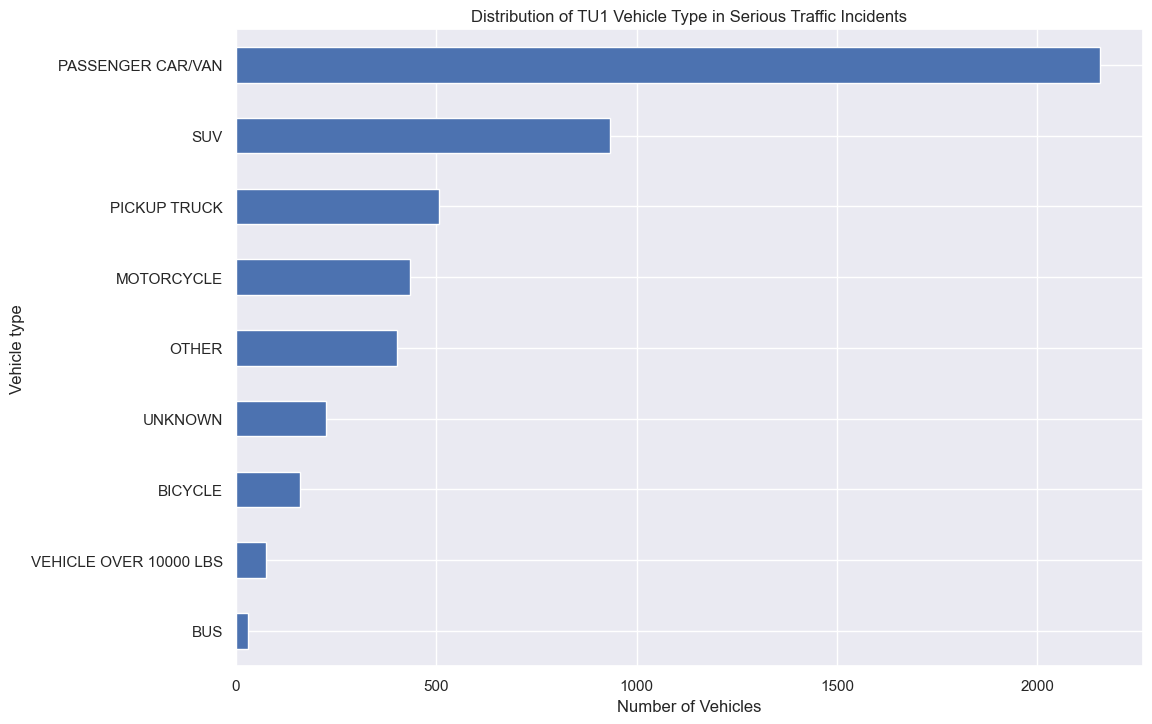

In [34]:
# distribution of injured tu1_vehicle type

injured.TU1_VEHICLE_TYPE.value_counts().sort_values().plot(kind='barh')
plt.title('Distribution of TU1 Vehicle Type in Serious Traffic Incidents')
plt.xlabel('Number of Vehicles')
plt.ylabel('Vehicle type')


From the chart above, we can see that the overwhelming majority of vehicle types causing these incidents are passenger cars/vans, followed by suvs and other vehicle types.

Text(0.5, 1.0, 'Distribution of Incidents Causing Injuries with Vehicle Types from 2013-2023')

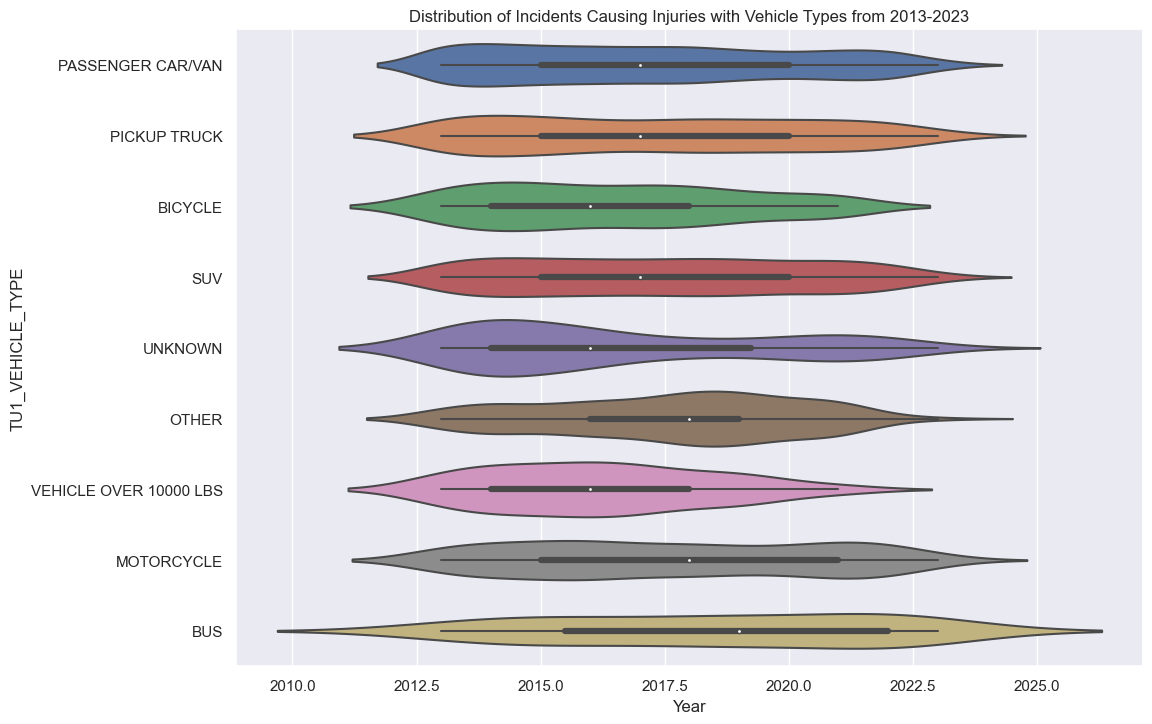

In [35]:
sns.violinplot(y = 'TU1_VEHICLE_TYPE', x = 'Year', data = injured)
plt.title("Distribution of Incidents Causing Injuries with Vehicle Types from 2013-2023")

The violin plot above shows the distribution of the different vehicle types that caused serious injuries across the years. It appears that the frequency of accidents across all vehicle categories remained approximately even across all years shown in the chart, with most incidents tapering off in recent years. Accidents caused by 'other' vehicle types appears to have slightly increased in frequency from 2018 and above, while most other categories appear to show a decrease in frequency from 2020 onwards.

### Part V. Conclusion



Overall, it appears that incident fatalities and injuries are on a downward trend. Unsurprisingly, injuries are most frequently caused and sustained in passenger cars/vans. This can be attributed to the fact that most people in the population drive passenger vehicles as opposed to other types modes of transportation. Thus it appears that incidents of passenger cars - passenger cars are the most common types of vehicle incidents resulting in a fatality or serious injury, with passenger cars being the most frequent mode of transportation to both be injured and the driver at fault. Following passenger vehicles, motorcycles and SUVs are the mode of transportation in which drivers appear to be injured frequently.

Some time periods to note include 2020, in which the global pandemic can be attributed to the sharp downward spike in overall vehicle incidents. With fewer drivers on the road, it is unsurprising that there are fewer traffic incidents recorded overall. Following 2020, traffic accidents increased, but not to the same pre-pandemic levels.

There appeared to be no notable outliers in this particular dataset over the time period that was analyzed. This is likely because of the overall size of the dataset (~220k rows). From a yearly view, any outliers would likely not affect the general analysis of the data, and thus we can reasonably conclude that our observations are fairly accurate.